# 임포트

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
%matplotlib inline

# 파일의 마운트

In [62]:
train_df = pd.read_csv('/content/world-happiness-report.csv')

# 항목의 설명

## · Country name 나라이름
각국의 이름
## · year 년
데이터가 수집된 해
## · Life Ladder (생활의 사다리)
행복감이고, 0이 '최악의 생활', 10이 '최상의 생활'을 나타내고 있다
## · Log GDP per capita 1인당 GDP
각국의 1인당 국내총생산(GDP) 수치
## · Social support 사회적 지원
어려울 때 의지할 수 있는 가족이나 친구가 있는지 여부를 나타내는 지표
## ·Healthylife expectancy at birth 출생시 건강수명
건강하게 생활할 수 있는 평균 수명의 연수
## Freedom to make life choices 인생의 선택을 할 자유
자신의 인생에 있어서 선택의 자유도를 느끼는 정도
## · Generosity 너그러움
기부나 봉사활동을 통한 타인에 대한 관용을 측정하는 지표
## · Perceptions of corruption 부패인식
정부나 기업의 부패에 대한 인식 정도
## · Positive affect 긍정적인 영향
## · Negative affect 부정적인 영향


In [63]:
print(train_df.shape)

(1949, 11)

(1949, 11)


(1949, 11)

# 전처리

In [64]:
#결손치가 몇 개인지 확인
train_df.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64

각 컬럼에 몇 개의 누락된 값이 있는지를 나타냅니다.
국가명, 대상년, 행복도 이외에는 모두 결손치가 있기 때문에 이것을 메워 갑니다.
이번에는 운 좋게도 모두 수치형 데이터이기 때문에 모두 같은 방법으로 채울 수 있을 것 같습니다.

In [65]:
train_df_tmp_3 = train_df

fill_median = lambda x: x.fillna(x.median())

cols = ['Log GDP per capita', 'Social support',
        'Healthy life expectancy at birth', 'Freedom to make life choices',
        'Generosity', 'Perceptions of corruption',
        'Positive affect', 'Negative affect']

for col in cols:
    train_df_tmp_3[col] = train_df_tmp_3.groupby('Country name')[col].transform(fill_median)

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local

국가명('Country name')마다 묶어서 각 컬럼의 수치의 중앙값을 구해서 결손에 대입하는 방식을 사용했습니다.

In [66]:
train_df_tmp_3.isnull().sum()

Country name                         0
year                                 0
Life Ladder                          0
Log GDP per capita                  19
Social support                       1
Healthy life expectancy at birth    36
Freedom to make life choices         0
Generosity                          19
Perceptions of corruption           28
Positive affect                      2
Negative affect                      1
dtype: int64

아무래도 이것만으로는 채우지 못한 부분이 있는 것 같아요.
NaN이 되어 있는 부분을 표시해서 원인을 찾아보도록 하겠습니다.

In [67]:
train_df_tmp_3[train_df_tmp_3['Log GDP per capita'].isnull()]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
423,Cuba,2006,5.418,NaN,0.970,68.44,0.281,NaN,NaN,0.647,0.277
1280,North Cyprus,2012,5.463,NaN,0.871,NaN,0.693,NaN,0.855,0.709,0.405
1281,North Cyprus,2013,5.567,NaN,0.869,NaN,0.775,NaN,0.715,0.622,0.443
1282,North Cyprus,2014,5.786,NaN,0.802,NaN,0.830,NaN,0.692,0.724,0.311
1283,North Cyprus,2015,5.843,NaN,0.791,NaN,0.785,NaN,0.659,0.702,0.319
1284,North Cyprus,2016,5.827,NaN,0.808,NaN,0.796,NaN,0.670,0.644,0.346
1285,North Cyprus,2018,5.608,NaN,0.837,NaN,0.797,NaN,0.614,0.480,0.262
1286,North Cyprus,2019,5.467,NaN,0.803,NaN,0.793,NaN,0.640,0.494,0.296
1559,Somalia,2014,5.528,NaN,0.611,49.60,0.874,NaN,0.456,0.834,0.207
1560,Somalia,2015,5.354,NaN,0.599,50.10,0.968,NaN,0.410,0.901,0.187


우선 GDP가 결손되어 있는 데이터에 대해서만 줄여서 표시해 보았습니다.
이것을 보면 묻혀 있지 않은 부분은 국가명의 중복이 상당히 많은 것 같습니다.
원인이 보이기 시작했기 때문에 국가명 'North Cyprus' 의 모든 데이터를 보여줍니다.

In [68]:
train_df_tmp_3[train_df_tmp_3['Country name'] == 'North Cyprus']

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1280,North Cyprus,2012,5.463,NaN,0.871,NaN,0.693,NaN,0.855,0.709,0.405
1281,North Cyprus,2013,5.567,NaN,0.869,NaN,0.775,NaN,0.715,0.622,0.443
1282,North Cyprus,2014,5.786,NaN,0.802,NaN,0.830,NaN,0.692,0.724,0.311
1283,North Cyprus,2015,5.843,NaN,0.791,NaN,0.785,NaN,0.659,0.702,0.319
1284,North Cyprus,2016,5.827,NaN,0.808,NaN,0.796,NaN,0.670,0.644,0.346
1285,North Cyprus,2018,5.608,NaN,0.837,NaN,0.797,NaN,0.614,0.480,0.262
1286,North Cyprus,2019,5.467,NaN,0.803,NaN,0.793,NaN,0.640,0.494,0.296


NaN에서 추출한 경우와 같은 수의 데이터가 표시되었습니다.다른 나라에서도 마찬가지였습니다.

아무래도 단순한 이야기였던 것 같고, '국명별로 한 묶음으로 중앙값을 산출해 결손을 메운다'는 사정상,
원래 그 나라의 모든 칸에 수치가 들어 있지 않으면 채울 방법이 없다는 것이었던 것 같습니다.

자, 이러한 나머지 결손치를 어떻게 할 것인가 생각해 보았습니다만,
동 지역에서도 국가마다 사정은 상당히 달라지는 것이 아닌가 하는 우려, 상기와 같이 결손 부위가 여러 개 있는 데이터가 많은 것, 전체적으로 보면 결손치의 비율이 적다
라는 이유로, 이번에는 리스트 와이즈 삭제라고 하는 수법을 선택했습니다.

이것은 하나라도 결손치가 있는 데이터를 행마다 통째로 삭제해 버리는 방법입니다.
아래와 같이 삭제합니다.

In [69]:
train_df_tmp_3 = train_df_tmp_3.dropna()

print(train_df_tmp_3.shape)
train_df_tmp_3.isnull().sum()

(1878, 11)


Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

이번에야말로 결손치를 모두 메우는 데 성공했어요.
데이터 전체의 수도 그렇게 줄어들지는 않았기 때문에 괜찮을 거라고 생각합니다.

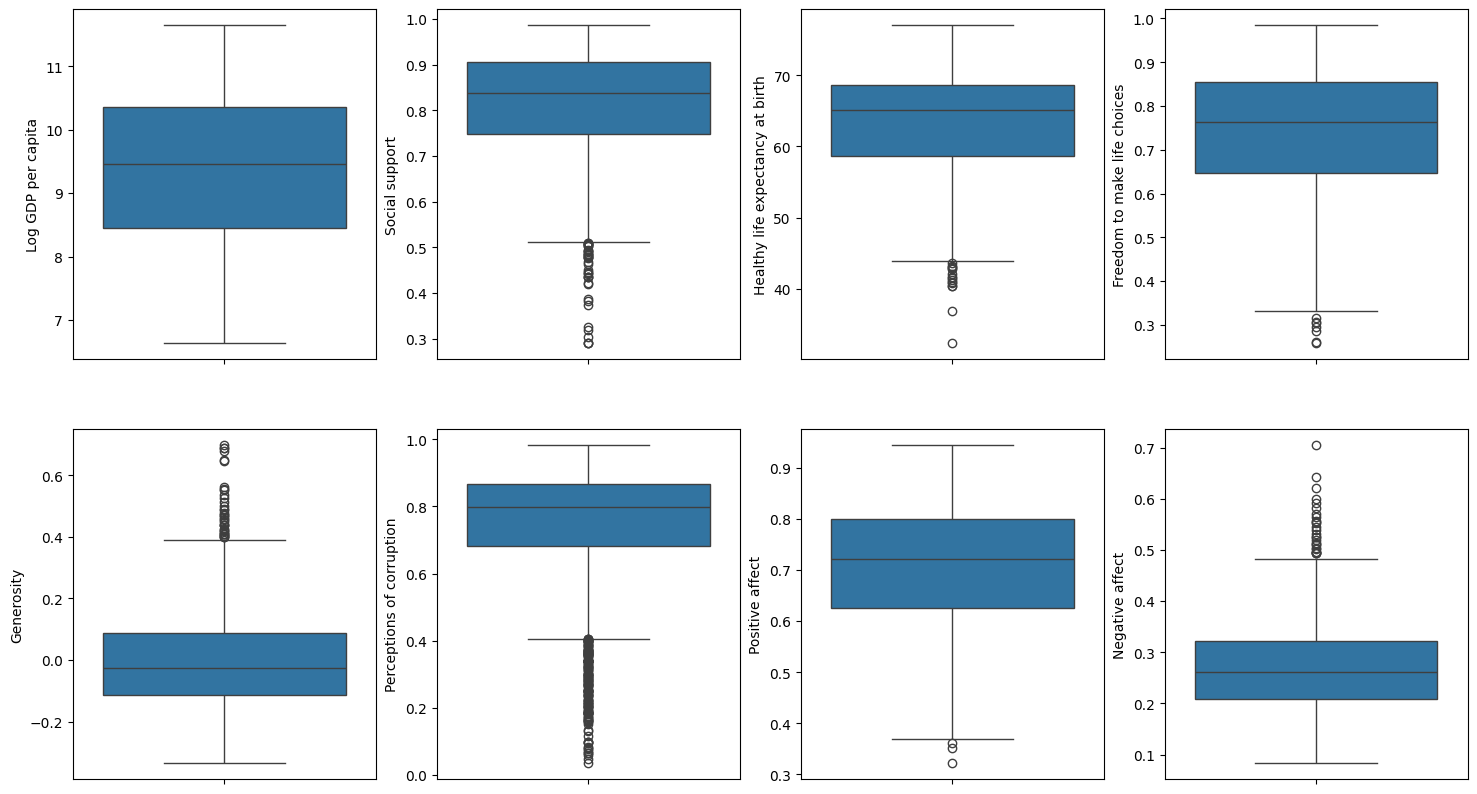

In [70]:
# 이상치?

fig, axes = plt.subplots(2, 4, figsize=(18, 10))
sns.boxplot(data=train_df_tmp_3, y='Log GDP per capita', ax=axes[0, 0])
sns.boxplot(data=train_df_tmp_3, y='Social support', ax=axes[0, 1])
sns.boxplot(data=train_df_tmp_3, y='Healthy life expectancy at birth', ax=axes[0, 2])
sns.boxplot(data=train_df_tmp_3, y='Freedom to make life choices', ax=axes[0, 3])
sns.boxplot(data=train_df_tmp_3, y='Generosity', ax=axes[1, 0])
sns.boxplot(data=train_df_tmp_3, y='Perceptions of corruption', ax=axes[1, 1])
sns.boxplot(data=train_df_tmp_3, y='Positive affect', ax=axes[1, 2])
sns.boxplot(data=train_df_tmp_3, y='Negative affect', ax=axes[1, 3])
plt.show()

box plot를 쓰고 칼럼의 숫자가 어떻게 분부되고 있는지 확인
값에 편차가 있습니다만, 이상치라고는 하지는 않겠습니다

In [71]:
#world　natural earth_lowres 데이터 세트 가져오기
#데이터 프레임의 선두행 표시

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

<ipython-input-71-557d834e8cc1>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [72]:
#train_df_tmp_3라고 하는 데이터 프레임의 Country name 열의 값을 치환

train_df_tmp_3['Country name'] = train_df_tmp_3['Country name'].replace({'United States' : 'United States of America',
                                                          'Taiwan Province of China':'Taiwan',
                                                          'Bosnia and Herzegovina':'Bosnia and Herz.',
                                                          'Dominican Republic':'Dominican Rep.',
                                                          'Swaziland':'eSwatini'})

<ipython-input-72-4f4f262ed703>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_tmp_3['Country name'] = train_df_tmp_3['Country name'].replace({'United States' : 'United States of America',


In [73]:
#df_ladder_mean

df_ladder_mean = pd.DataFrame({'Country name': train_df_tmp_3['Country name'].unique(),
                              'Life Ladder': train_df_tmp_3.groupby('Country name')['Life Ladder'].mean()})
df_ladder_mean = df_ladder_mean.reset_index(drop=True)

조금 전 행복도 전체 평균을 사용해서 색을 구분하기 때문에 원래 컬럼을 추가합니다.

In [74]:
least_happy_country = df_ladder_mean.sort_values('Life Ladder', ignore_index=True)['Country name'].iloc[0]

most_happy_country = df_ladder_mean.sort_values('Life Ladder', ignore_index=True)['Country name'].iloc[-1]

print('가장 행복한 나라:', most_happy_country, '가장가장 불행한 나라:', least_happy_country)

가장 행복한 나라: Denmark 가장가장 불행한 나라: Central African Republic


In [75]:
df_ladder_mean.sort_values('Life Ladder', ignore_index=True,
                            ascending=False).query('`Country name` == "South Korea"')

,Country name,Life Ladder
51,South Korea,5.874933


In [76]:
df_ladder_mean.sort_values('Life Ladder', ignore_index=True,
                            ascending=False).query('`Country name` == "Japan"')

,Country name,Life Ladder
46,Japan,6.0164


한국과 일본의 행복도를 표시해보았습니다.
거의 똑같습니다.


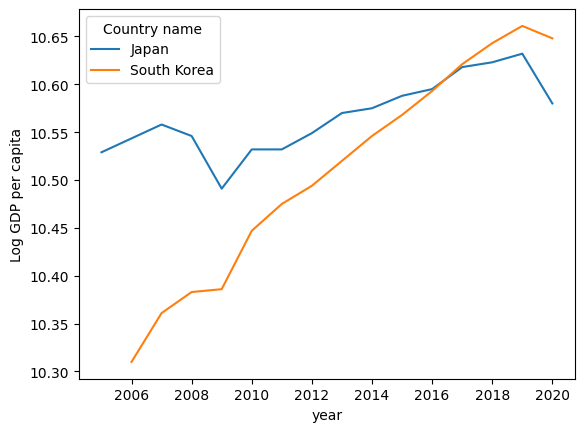

In [77]:
#Log GDP per capita
# 한국과 일본의 필터 데이터
skorea_japan = train_df_tmp_3[train_df_tmp_3['Country name'].isin(['South Korea', 'Japan'])]

# x축에 연도가 있는 선 그림을 만들고 y축에 1인당 GDP 로그를 작성
sns.lineplot(data=skorea_japan, x='year', y='Log GDP per capita', hue='Country name')

# y축 레이블 설정
plt.ylabel('Log GDP per capita')

# 플롯 표시
plt.show()

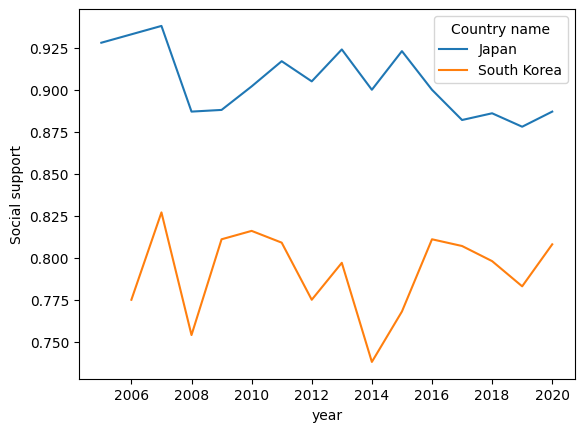

In [78]:
#Social support

# 한국과 일본의 필터 데이터
skorea_japan = train_df_tmp_3[train_df_tmp_3['Country name'].isin(['South Korea', 'Japan'])]

# x축에 연도를 표시하고 y축에 사회적 지원을 표시하는 선 그림을 작성
sns.lineplot(data=skorea_japan, x='year', y='Social support', hue='Country name')

# y축 레이블 설정
plt.ylabel('Social support')

# 플롯 표시
plt.show()

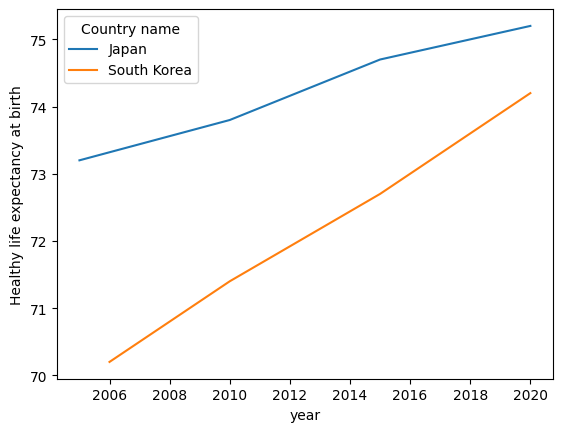

In [96]:
#Healthy life expectancy at birth

# 한국과 일본의 필터 데이터
skorea_japan = train_df_tmp_3[train_df_tmp_3['Country name'].isin(['South Korea', 'Japan'])]

# x축에 연도가 있는 선 그림을 만들고 y축에 1인당 GDP 로그를 작성합니다
sns.lineplot(data=skorea_japan, x='year', y='Healthy life expectancy at birth', hue='Country name')

# y축 레이블 설정
plt.ylabel('Healthy life expectancy at birth')

# 플롯 표시
plt.show()

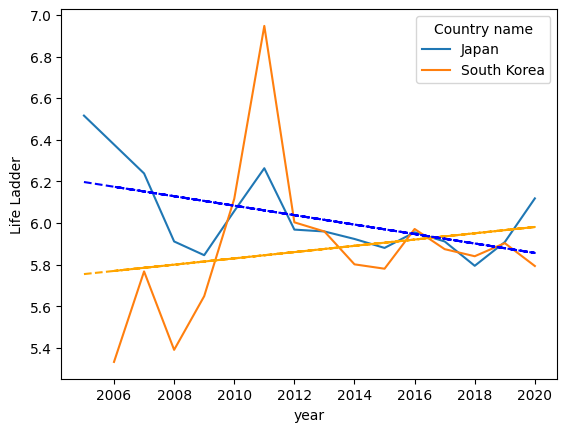

In [97]:
# 한국과 일본의 필터 데이터
skorea_japan = train_df_tmp_3[train_df_tmp_3['Country name'].isin(['South Korea', 'Japan'])]

# x축에는 연도가 있고 y축에는 Life Ladder가 있는 선 그림을 작성합니다
sns.lineplot(data=skorea_japan, x='year', y='Life Ladder', hue='Country name')

# y축 레이블 설정
plt.ylabel('Life Ladder')

# 국가별 데이터에 선형 회귀 모형 적합
model_sk = np.polyfit(skorea_japan[skorea_japan['Country name'] == 'South Korea']['year'],
                     skorea_japan[skorea_japan['Country name'] == 'South Korea']['Life Ladder'], 1)
model_jp = np.polyfit(skorea_japan[skorea_japan['Country name'] == 'Japan']['year'],
                     skorea_japan[skorea_japan['Country name'] == 'Japan']['Life Ladder'], 1)

# 각 연도의 생명 사다리 예측
pred_sk = np.polyval(model_sk, skorea_japan['year'])
pred_jp = np.polyval(model_jp, skorea_japan['year'])

# 회귀선 그림 그리기
plt.plot(skorea_japan['year'], pred_sk, linestyle='--', color='orange')
plt.plot(skorea_japan['year'], pred_jp, linestyle='--', color='blue')

# 플롯 표시
plt.show()

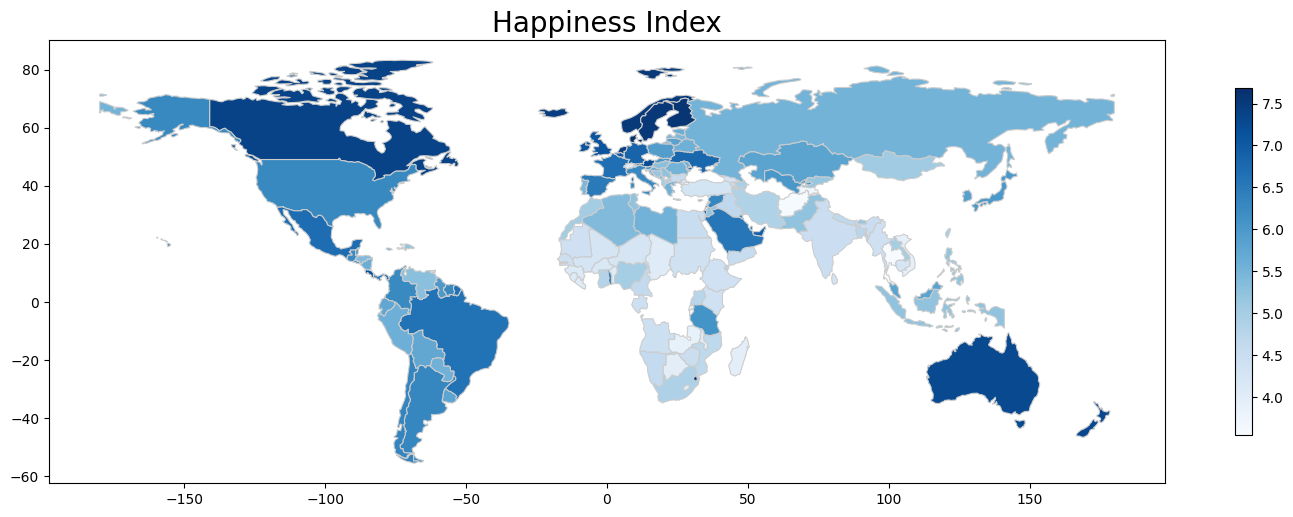

In [80]:
#세계 지도상에 데이터를 플롯하는 함수를 정의하고, 그 후 실제로 플롯

def plot_on_worldmap(df, col_to_map, title=None):

    mapped = world.set_index('name').join(df.set_index('Country name')).reset_index()
    to_be_mapped = col_to_map
    vmin, vmax = df[col_to_map].min(), df[col_to_map].max()
    fig, ax = plt.subplots(1, figsize=(18,9))
    mapped.dropna().plot(column=to_be_mapped, cmap='Blues', linewidth=0.8,legend=True, ax=ax,
                         edgecolors='0.8', legend_kwds={'shrink': 0.5})
    ax.set_title(title, fontdict={'fontsize':20})


plot_on_worldmap(df_ladder_mean, 'Life Ladder', 'Happiness Index')

지정한 컬럼의 대소를 색의 농담으로 표현하는 형태입니다.
이번에 리스트 와이즈 삭제를 해 버린 만큼 구멍이 뚫린 것처럼 되어 버렸지만, 대체로 인상대로라는 느낌이였습니다.
서유럽, 북유럽, 아메리카, 오세아니아가 높고, 동남아시아, 중동, 아프리카가 낮은 형태가 되었습니다.


In [81]:
#上のコードの説明

# def plot_on_worldmap(分析データフレーム, マッピング列, グラフタイトル=None):

#     結合データフレーム = world.set_index('name').join(分析データフレーム.set_index('Country name')).reset_index()
#     マッピング列 = マッピング列
#     最小マッピング値, 最大マッピング値 = 分析データフレーム[マッピング列].min(), 分析データフレーム[マッピング列].max()
#     図表, 軸 = plt.subplots(1, figsize=(18,9))
#     結合データフレーム.dropna().plot(column=マッピング列, cmap='Blues', linewidth=0.8, legend=True, ax=軸,
#                                     edgecolors='0.8', legend_kwds={'shrink': 0.5})
#     軸.set_title(グラフタイトル, fontdict={'fontsize':20})

# plot_on_worldmap(df_ladder_mean, 'Life Ladder', 'Happiness Index')


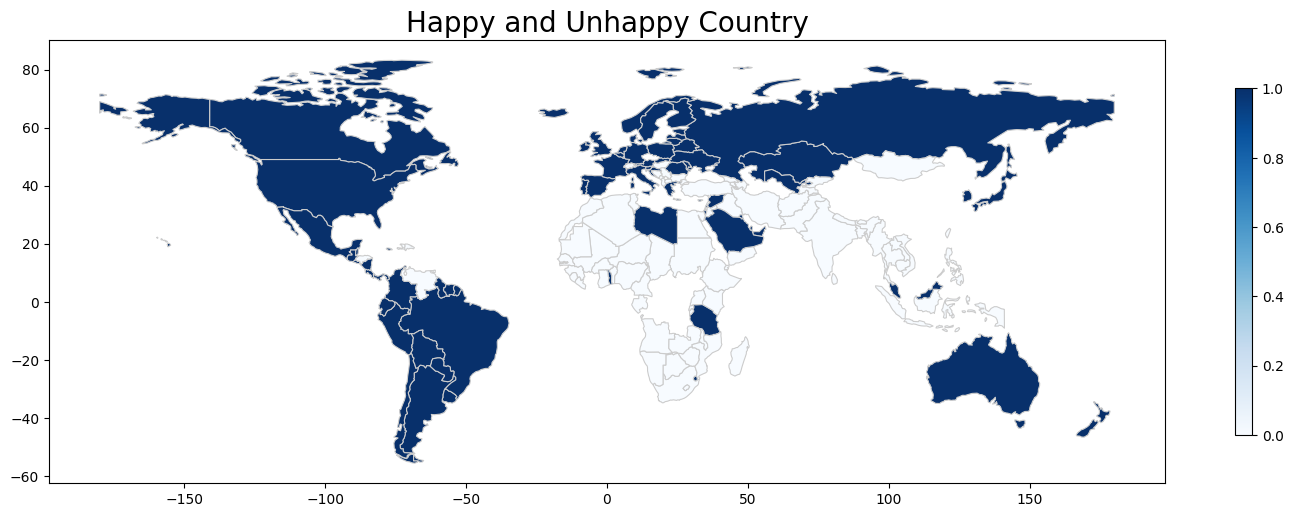

In [82]:
#1. 행복도 역치 산출:
threshold = df_ladder_mean['Life Ladder'].mean()
#2. 새 열 추가:
df_ladder_mean['Happy_or_Unhappy'] = df_ladder_mean['Life Ladder'].apply(lambda x: 1 if x >= threshold else 0)
#3. 세계 지도에 대한 플롯:
plot_on_worldmap(df_ladder_mean, 'Happy_or_Unhappy', 'Happy and Unhappy Country')

아래와 같이 전체 평균 이상, 이하로 행복도를 판정해 보면 더욱 현저합니다.


In [83]:
# 上のコードの説明

# 幸せの値 = 生活指標データフレーム['Life Ladder'].mean()

# 生活指標データフレーム['幸せ・不幸せ区分'] = 生活指標データフレーム['Life Ladder'].apply(lambda x: 1 if x >= 幸せの閾値 else 0)

# plot_on_worldmap(生活指標データフレーム, '幸せ・不幸せ区分', '幸せな国と不幸せな国')


In [84]:
#train_df_tmp_3 데이터 프레임의 각 열의 평균값을 df_all_mean 데이터 프레임에 계산하여 저장

df_all_mean = df_ladder_mean

for col in cols:
    df_all_mean[col] = list(train_df_tmp_3.groupby('Country name')[col].mean())

df_all_mean

,Country name,Life Ladder,Happy_or_Unhappy,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,3.594667,0,7.650833,0.508417,52.266667,0.518167,0.070083,0.843333,0.548667,0.326500
1,Albania,5.019385,0,9.384385,0.716231,67.546154,0.662923,-0.082692,0.869385,0.653846,0.299231
2,Algeria,5.389875,0,9.328875,0.804000,65.290000,0.528500,-0.150625,0.692000,0.607875,0.261375
3,Angola,4.420250,0,8.990000,0.738250,53.550000,0.456250,-0.088250,0.866750,0.613500,0.351250
4,Argentina,6.310133,1,10.033800,0.904400,67.900000,0.768200,-0.159867,0.842067,0.833467,0.284000
...,...,...,...,...,...,...,...,...,...,...,...
150,Venezuela,5.305857,0,8.655286,0.829429,66.928571,0.883857,0.002000,0.785786,0.646786,0.206571
151,Vietnam,3.912250,0,8.123083,0.739833,54.866667,0.622417,-0.130000,0.825750,0.530500,0.293583
152,Yemen,4.551714,0,8.066857,0.737714,51.707143,0.756786,0.013357,0.828857,0.720643,0.294357
153,Zambia,3.882600,0,7.850333,0.799400,50.233333,0.587933,-0.083000,0.844200,0.717733,0.224400


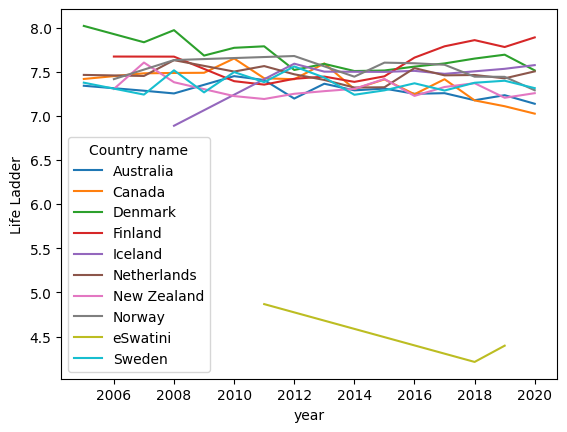

In [99]:
#행복도
# まずは、上位10か国を取得する
top_5_countries = df_ladder_mean.sort_values('Life Ladder', ascending=False).head(10)['Country name'].tolist()

# 次に、それらの国だけのデータフレームを作成する
top_5_df = train_df_tmp_3[train_df_tmp_3['Country name'].isin(top_5_countries)]

# 最後に、グラフを作成する
sns.lineplot(data=top_5_df, x="year", y="Life Ladder", hue='Country name')
plt.show()

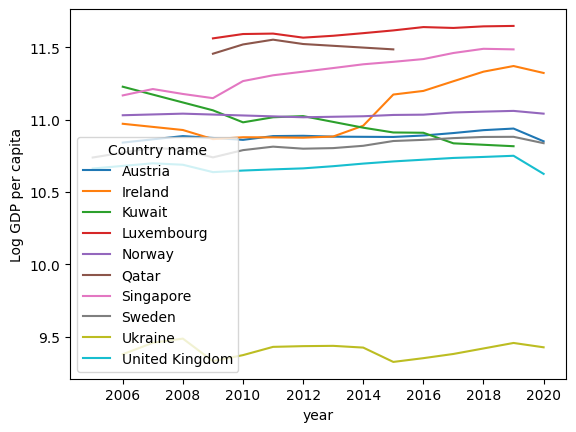

In [100]:
#Log GDP per capita

top_5_countries = df_ladder_mean.sort_values('Log GDP per capita', ascending=False).head(10)['Country name'].tolist()

top_5_df = train_df_tmp_3[train_df_tmp_3['Country name'].isin(top_5_countries)]

sns.lineplot(data=top_5_df, x="year", y="Log GDP per capita", hue='Country name')
plt.show()

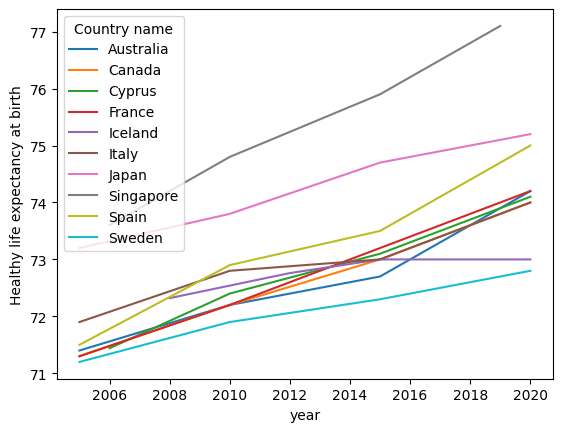

In [102]:
#Healthy life expectancy at birth

top_5_countries = df_ladder_mean.sort_values('Healthy life expectancy at birth', ascending=False).head(10)['Country name'].tolist()

top_5_df = train_df_tmp_3[train_df_tmp_3['Country name'].isin(top_5_countries)]

sns.lineplot(data=top_5_df, x="year", y="Healthy life expectancy at birth", hue='Country name')

plt.show()

In [ ]:
#Social support

# まずは、上位10か国を取得する
top_5_countries = df_ladder_mean.sort_values('Social support', ascending=False).head(10)['Country name'].tolist()

# 次に、それらの国だけのデータフレームを作成する
top_5_df = train_df_tmp_3[train_df_tmp_3['Country name'].isin(top_5_countries)]

# 最後に、グラフを作成する
sns.lineplot(data=top_5_df, x="year", y="Social support", hue='Country name')
plt.show()

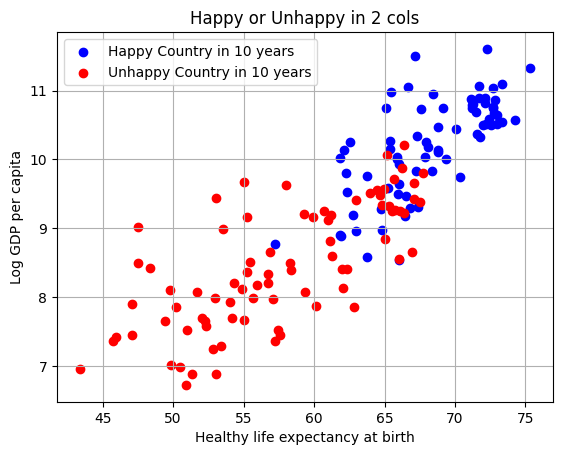

In [85]:
# '행복도'와 다른 2가지 지표(건강수명과 GDP)의 관계를 산포도로 가시화하는 처리

x1 = df_all_mean.query('Happy_or_Unhappy == 1')['Healthy life expectancy at birth']
y1 = df_all_mean.query('Happy_or_Unhappy == 1')['Log GDP per capita']
x0 = df_all_mean.query('Happy_or_Unhappy == 0')['Healthy life expectancy at birth']
y0 = df_all_mean.query('Happy_or_Unhappy == 0')['Log GDP per capita']

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(x1, y1, c='blue', label='Happy Country in 10 years')
ax.scatter(x0, y0, c='red', label='Unhappy Country in 10 years')

ax.set_title('Happy or Unhappy in 2 cols')
ax.set_xlabel('Healthy life expectancy at birth')
ax.set_ylabel('Log GDP per capita')

ax.grid(True)
ax.legend()
fig.show()

여기에서는 10년동안의 Happy,Unhappy에 데이터 열의 값을 기준으로 국가를 두 그룹으로 분류하고 있습니다.

파란색: 열 값이 1인 나라 (추정으로는 행복한 나라) 빨간색: 열 값이 0인 나라 (추정으로는 불행한 나라)

1인당 GDP 8.5, 건강 수명 60세, 이 정도가 큰 분기점이라고 할 수 있을 것 같습니다.


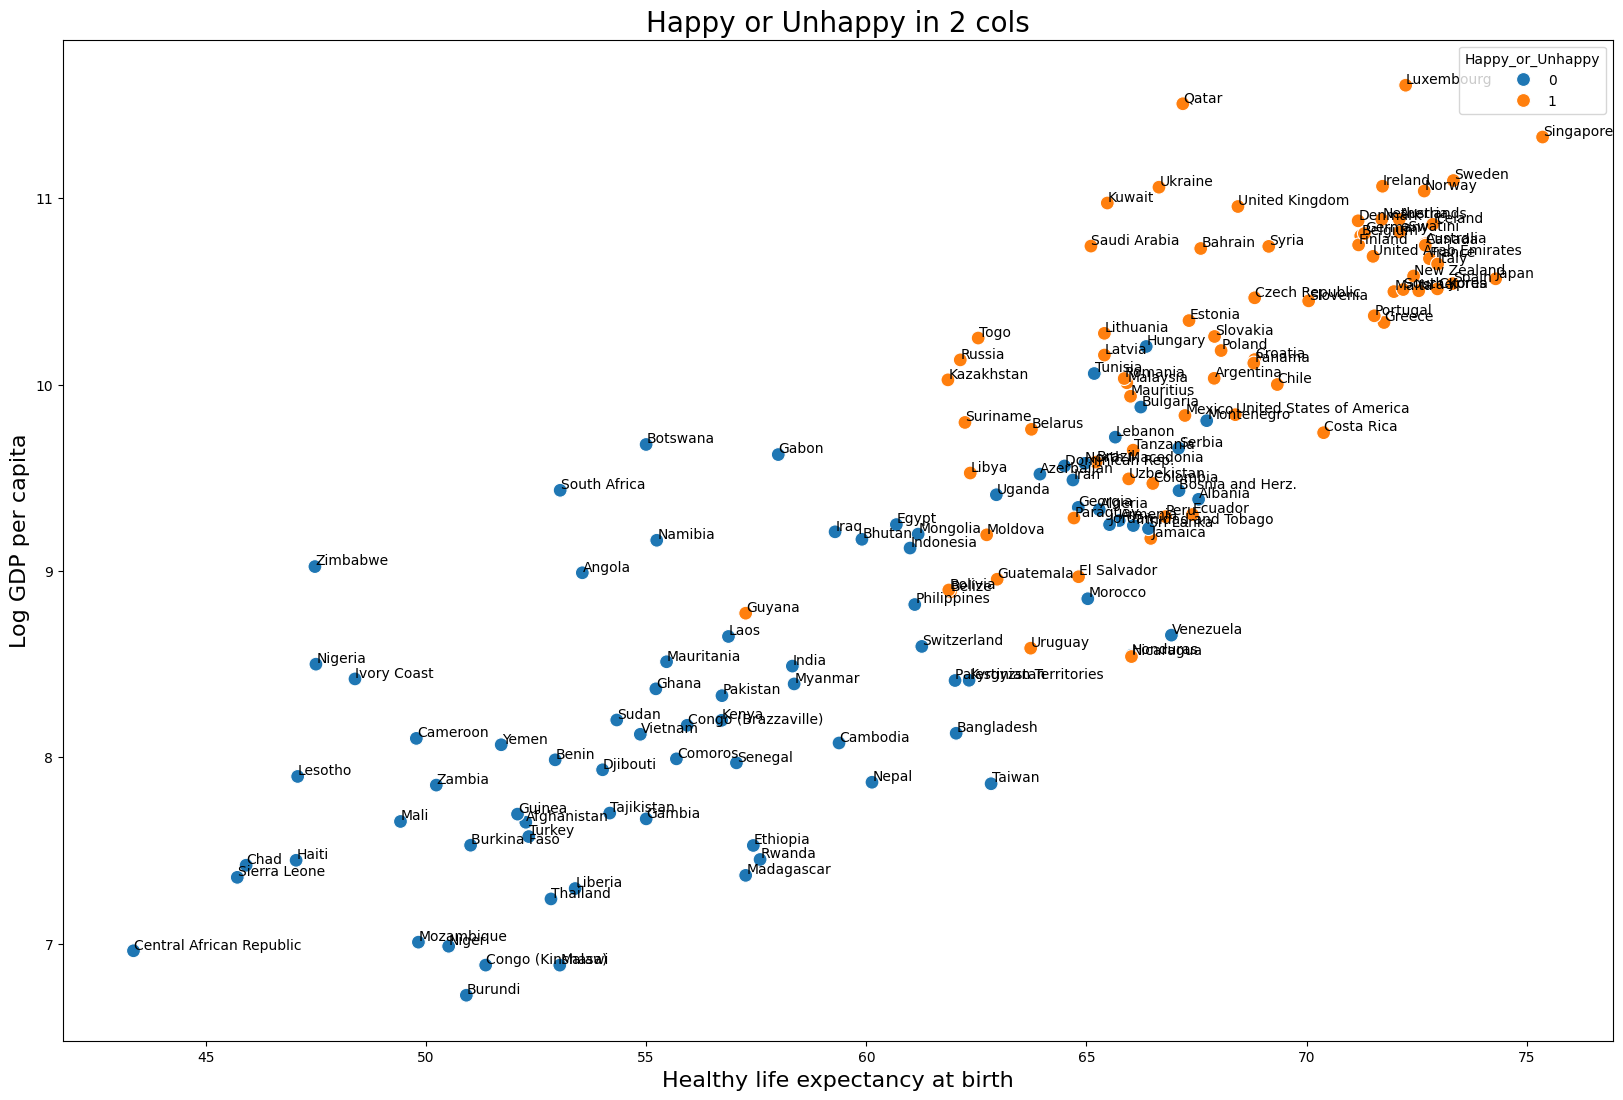

In [86]:
plt.figure(figsize=(20,13))
sns.scatterplot(data=df_all_mean,
                x='Healthy life expectancy at birth',
                y='Log GDP per capita',s=100, hue='Happy_or_Unhappy')

plt.title('Happy or Unhappy in 2 cols',fontsize=20)
plt.xlabel('Healthy life expectancy at birth',fontsize=16)
plt.ylabel('Log GDP per capita',fontsize=16)

for i in range(len(df_all_mean)):
    plt.text(s=df_all_mean.loc[i,'Country name'],
             x=df_all_mean.loc[i,'Healthy life expectancy at birth']+0.01,
             y=df_all_mean.loc[i,'Log GDP per capita']+0.01, fontsize=10)

plt.show()

seaborn을 사용하고 또한 국가명도 함께 표시해 보도록 하겠습니다.
할 수 있었습니다만, 점이 막혀 있기 때문에 문자도 겹쳐 보기 어려워져 버렸습니다.


서로의특징량이얼마나관계가깊은지1~-1로나타납니다.

이런 식으로 상관관계를 보고 싶을 경우 corrcoef는 각 행에 대해서 작용하기 때문에 대상이 되는 데이터 프레임을 T로 전치해 주어야 합니다.
그것을 seaborn에서 히트 맵으로 나타냈습니다.

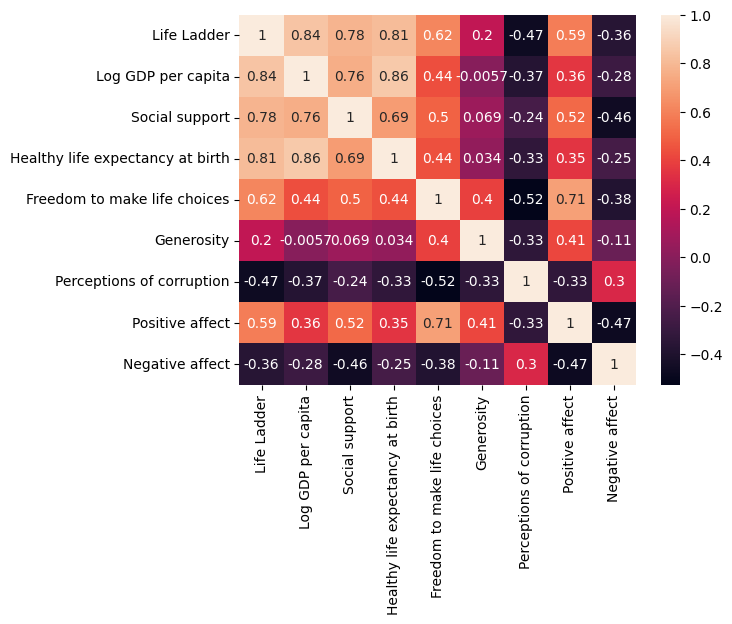

In [87]:
df_corr = df_all_mean.drop(columns=['Country name', 'Happy_or_Unhappy'])
df_R = np.corrcoef(df_corr.T)

sns.heatmap(df_R, annot=True, xticklabels=df_corr.columns,
                              yticklabels=df_corr.columns)
plt.show()

행복도와의 상관이 깊은 것은 역시 GDP와 건강수명, 여기서는 거기에 더해 social support(사회적 지원)가 들어오고 있습니다.


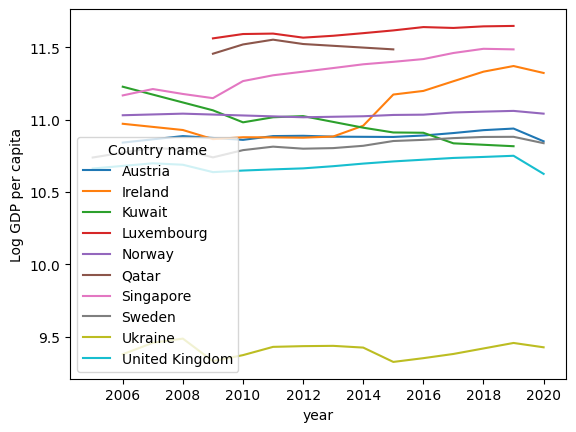

In [88]:
# Log GDP per capita

top_5_countries = df_ladder_mean.sort_values('Log GDP per capita', ascending=False).head(10)['Country name'].tolist()
top_5_df = train_df_tmp_3[train_df_tmp_3['Country name'].isin(top_5_countries)]
sns.lineplot(data=top_5_df, x="year", y="Log GDP per capita", hue='Country name')
plt.show()

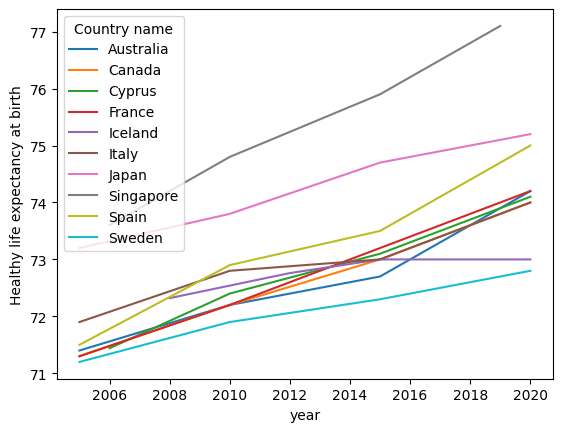

In [89]:
#Healthy life expectancy at birth

top_5_countries = df_ladder_mean.sort_values('Healthy life expectancy at birth', ascending=False).head(10)['Country name'].tolist()
top_5_df = train_df_tmp_3[train_df_tmp_3['Country name'].isin(top_5_countries)]
sns.lineplot(data=top_5_df, x="year", y="Healthy life expectancy at birth", hue='Country name')

plt.show()

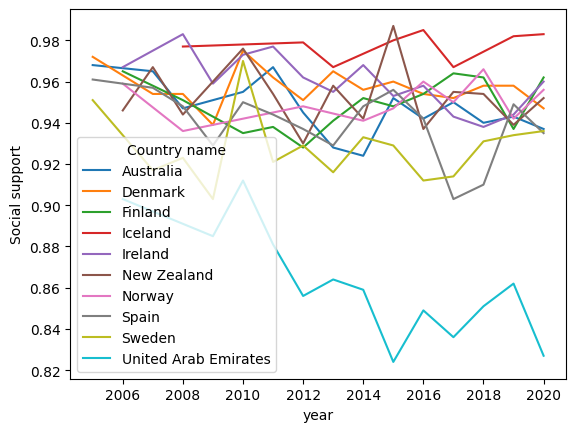

In [90]:
#Social support

# 우선 상위 10개국을 취득하는
top_5_countries = df_ladder_mean.sort_values('Social support', ascending=False).head(10)['Country name'].tolist()
# 다음으로, 그 나라들만의 데이터 프레임을 작성한다
top_5_df = train_df_tmp_3[train_df_tmp_3['Country name'].isin(top_5_countries)]
# 마지막으로그래프작성하기
sns.lineplot(data=top_5_df, x="year", y="Social support", hue='Country name')
plt.show()

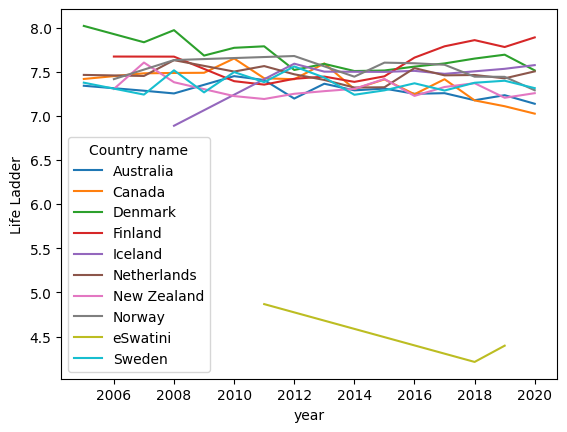

In [91]:
#행복도

top_5_countries = df_ladder_mean.sort_values('Life Ladder', ascending=False).head(10)['Country name'].tolist()
top_5_df = train_df_tmp_3[train_df_tmp_3['Country name'].isin(top_5_countries)]
sns.lineplot(data=top_5_df, x="year", y="Life Ladder", hue='Country name')
plt.show()

In [92]:
#상관관계 행렬 df_corr2에서 주성분 분석(PCA)을 수행하여 2차원의 주성분으로 변
df_corr2 = df_corr.drop(columns=['Life Ladder', 'Generosity',
                                 'Perceptions of corruption', 'Negative affect'])

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_corr2)

그리고 이대로라면, 어느 특징량이 어느 정도 효과가 있는지 모르기 때문에, バイプロット（Biplot）라고 하는 수법을 사용해 각 특징량의 효과를 그립니다.

X_pca에 각 데이터의 주성분 분석 결과가 들어있는데 이번에는 이것을 조금 전에 플롯하고 싶기 때문에 데이터 프레임화를 해서 원래의 것에 연결을 시키겠습니다.


In [93]:
#X_pca라는 데이터 프레임에서 새로운 데이터 프레임 df_pca를 만듭니다.
#df_pca의 열명을 'pca0'과 'pca1'로 변경합니다.
#df_all_mean과 df_pca를 열 방향으로 연결하여 새로운 데이터 프레임 df_mean_pca를 만듭니다.


df_pca = pd.DataFrame(X_pca)

df_pca.columns = ['pca0', 'pca1']
df_mean_pca = pd.concat([df_all_mean, df_pca], axis=1)

df_mean_pca

,Country name,Life Ladder,Happy_or_Unhappy,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,pca0,pca1
0,Afghanistan,3.594667,0,7.650833,0.508417,52.266667,0.518167,0.070083,0.843333,0.548667,0.326500,10.456842,-0.244101
1,Albania,5.019385,0,9.384385,0.716231,67.546154,0.662923,-0.082692,0.869385,0.653846,0.299231,-4.919323,-0.573456
2,Algeria,5.389875,0,9.328875,0.804000,65.290000,0.528500,-0.150625,0.692000,0.607875,0.261375,-2.676119,-0.322815
3,Angola,4.420250,0,8.990000,0.738250,53.550000,0.456250,-0.088250,0.866750,0.613500,0.351250,9.003131,0.920235
4,Argentina,6.310133,1,10.033800,0.904400,67.900000,0.768200,-0.159867,0.842067,0.833467,0.284000,-5.360681,0.038222
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Venezuela,5.305857,0,8.655286,0.829429,66.928571,0.883857,0.002000,0.785786,0.646786,0.206571,-4.212195,-1.198575
151,Vietnam,3.912250,0,8.123083,0.739833,54.866667,0.622417,-0.130000,0.825750,0.530500,0.293583,7.814122,-0.111646
152,Yemen,4.551714,0,8.066857,0.737714,51.707143,0.756786,0.013357,0.828857,0.720643,0.294357,10.950496,0.265771
153,Zambia,3.882600,0,7.850333,0.799400,50.233333,0.587933,-0.083000,0.844200,0.717733,0.224400,12.440468,0.250072


그리고 이 pca를 세로축, 가로축으로 잡고 산포도로 플롯을 합니다.
또 이대로라면, 어느 특징량이 어느 정도 효과가 있는지 모르기 때문에, 바이플롯이라고 하는 수법을 사용해 각 특징량의 효과를 그립니다.

원래 특징량이 어느 방향으로 작용하고 있는지 pca.components_를 화살표로 플롯함으로써 알 수 있게 됩니다.

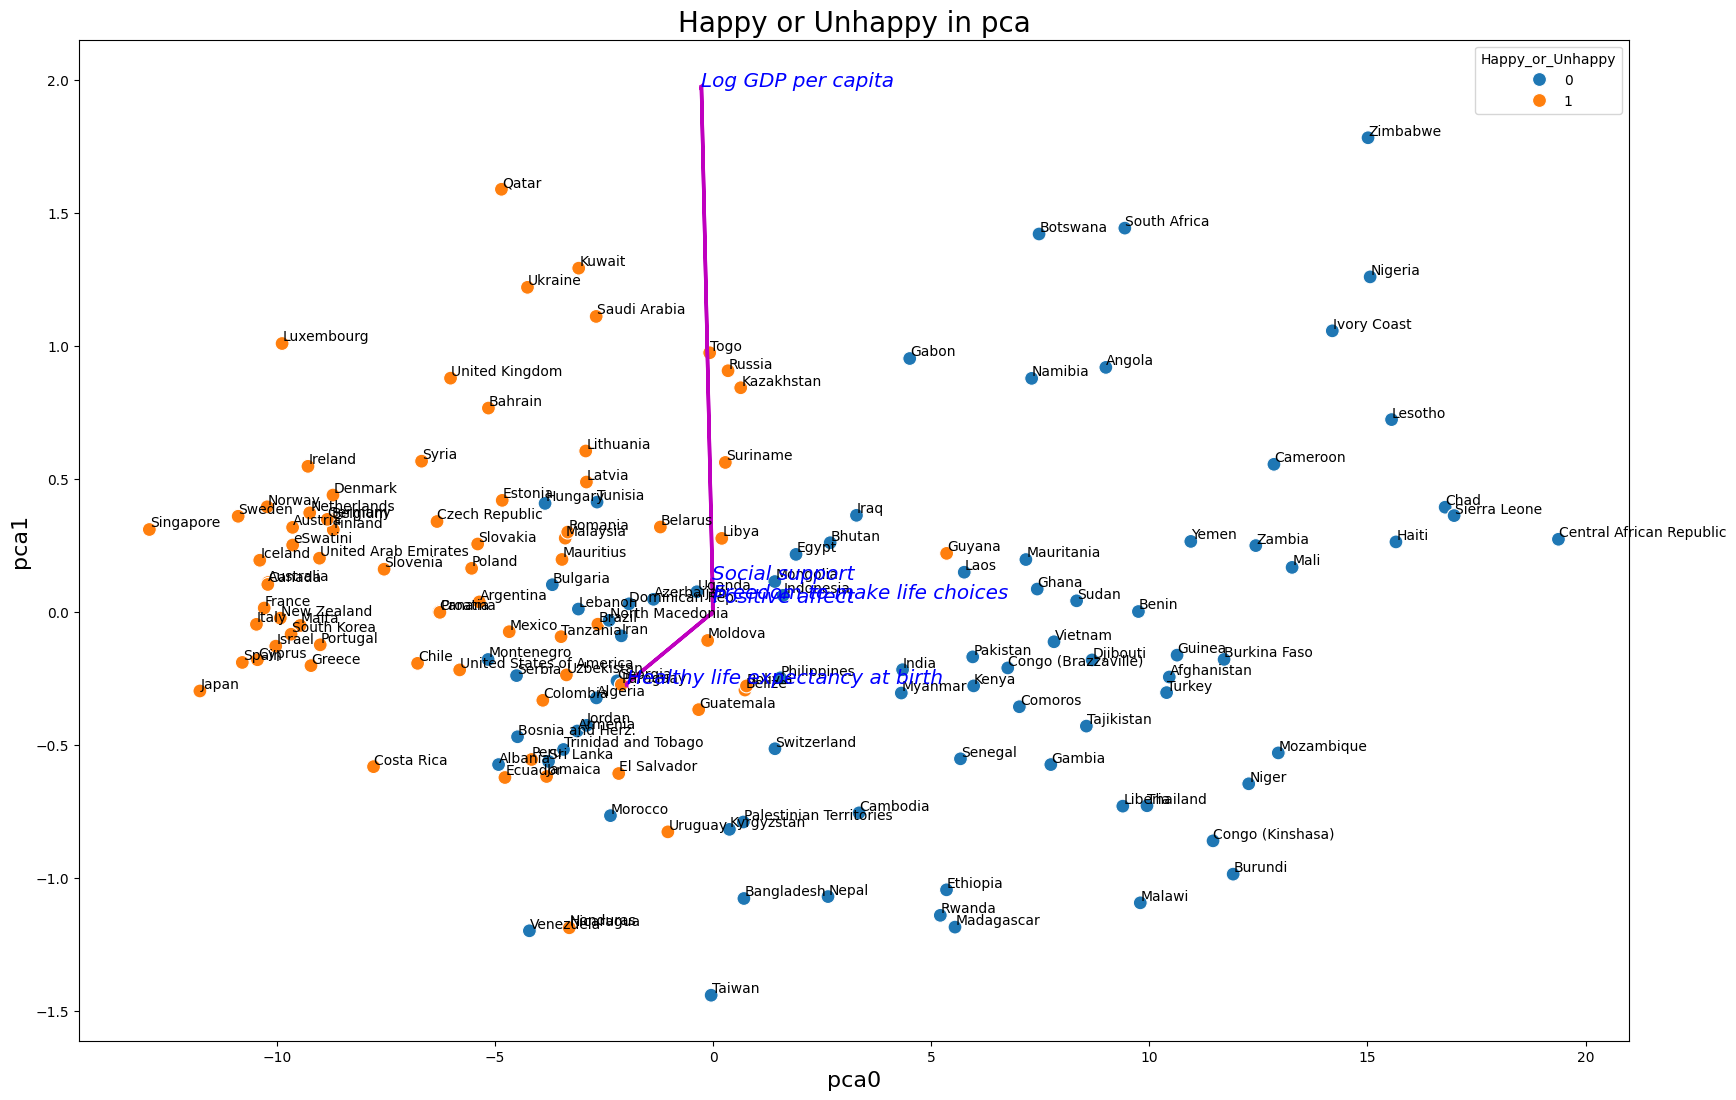

In [94]:
#df_mean_pca というデータフレームに含まれるデータを、主成分分析 (PCA) の結果に基づいて可視化するために使用
plt.figure(figsize=(20,13))
sns.scatterplot(data=df_mean_pca, x='pca0',y='pca1',s=100, hue='Happy_or_Unhappy')

plt.title('Happy or Unhappy in pca',fontsize=20)
plt.xlabel('pca0',fontsize=16)
plt.ylabel('pca1',fontsize=16)

for i in range(len(df_mean_pca)):
    plt.text(s=df_mean_pca.loc[i,'Country name'],
             x=df_mean_pca.loc[i,'pca0']+0.01,
             y=df_mean_pca.loc[i,'pca1']+0.01, fontsize=10)

pc0 = pca.components_[0]
pc1 = pca.components_[1]

for i in range(pc0.shape[0]):
    plt.arrow(0, 0, pc0[i]*2, pc1[i]*2, color='m', linestyle='-', linewidth=2.5)
    plt.text(pc0[i]*2,
             pc1[i]*2,
             df_corr2.columns[i],
             color='b',
             style='italic',
             size='x-large')

plt.show()

행복도가 높은 나라들이 왼쪽에 모여 있습니다. pca0는 낮을수록, pca1은 높을수록 좋은 경향이 있는 것 같습니다. GDP는 왼쪽 위 방향으로 작용하고 있고, 건강 수명은 왼쪽 아래 방향으로 작용하고 있는 것 같습니다.화살표의 길이로 보아도 역시 이 2개가 요소로써 큰 것 같습니다.


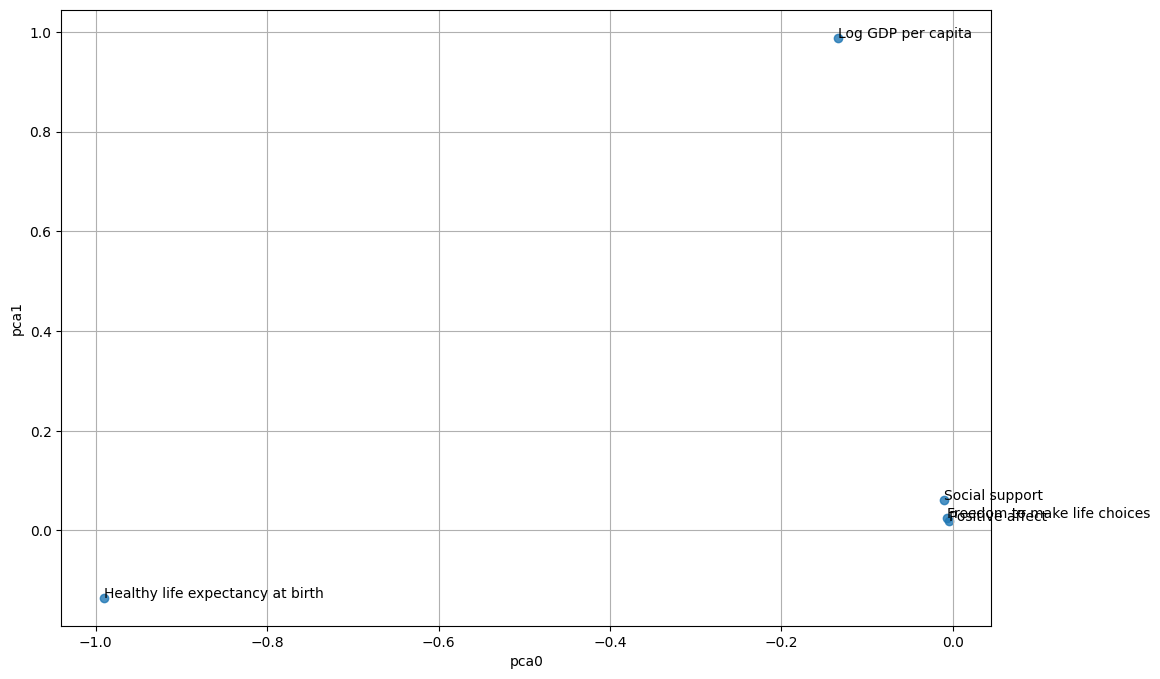

In [95]:
#주성분 분석(PCA) 결과를 바탕으로 각 특징이 주성분 공간 기여도 가시화

plt.figure(figsize=(12, 8))
for x, y, name in zip(pc0, pc1, df_corr2.columns[0:]):
    plt.text(x, y, name)

plt.scatter(pc0, pc1, alpha=0.8)
plt.grid()
plt.xlabel("pca0")
plt.ylabel("pca1")

plt.show()

특징량의 효과만을 플롯했습니다.
0,0의 위치에서 각 점을 향해 화살표가 뻗어 있는 이미지입니다.